In [120]:
import matplotlib.pyplot as plt
from collections import Counter
import requests
import networkx
import pickle
import json
from secrets import username, token

In [6]:
github_link = "https://api.github.com"
starting_links = ["/ljpy/meetups"]

In [23]:
def get_information_on_user(user):
    print(user)
    user_info = requests.get("https://api.github.com/users/" + user, auth=(username,token))
    user_info = json.loads(user_info.text)
    if not "location" in user_info:
        return None
    location = user_info["location"]
    if user in all_users:
        return None
    all_users.add(user)
    if not location or not "slovenia" in location.lower():
        return None
    users_locations[user] = location
    get_additional_people("https://api.github.com/users/" + user + "/followers", user, True)
    get_additional_people("https://api.github.com/users/" + user + "/following", user, False)
    return None

In [24]:
def get_additional_people(link, user, direction):
    people = requests.get(link, auth=(username,token))
    people = json.loads(people.text)
    for person in people:
        if not person or not "login" in person:
            continue
        person_name = person["login"]
        relationship = [user, person_name]
        if direction:
            relationship = relationship[::-1]
        all_relationships.add(tuple(relationship))
        if not person_name in all_users:
            get_information_on_user(person_name)

In [29]:
all_relationships = set()
all_users = set()
users_locations = dict()

In [30]:
get_information_on_user("sarajaksa")

sarajaksa
hannesbarbez
higty
LeoNerdoG
muros-ct
donho
mdo
fat
caioproiete
macdrifter
bhollis
flipbit
dhg
nmetulev
mfilippov
vernnobile
madskristensen
scommisso
alexandru-paduraru
ErikEJ
csdahlberg
AndersAbel
julielerman
JoeEsquire
saeedafshari
muros
timcreative
gautamkrishnar
MehediH
swmitra
docknight
chelaruc
radovankavicky
jerneju
klemensavli
brodul
zejn
matjaz
chrismatthieu
xrado
cheeaun
jeremeamia
Kami
rphillips
indexzero
springmeyer
trepca
philips
dispalt
Marak
Sannis
russellhaering
tomazk
jondot
rsdoiel
bjzu
jankom
loisaidasam
otobrglez
HairyFotr
kohlschuetter
InvoiceFox
mrfoto
rodp
mfilej
mihar
lenart
some1else
Thorsson
svetlyak40wt
laforge49
gto76
sarathesh
ialja
FloorD
lumeaa
Fibiola
audreyr
JordanHatch
pijab
ssstofff
khaidirtuah
andrew
a-s-12
sparkica
dominikb1888
izakp
mprabhuram
dz0ny
RobinWu
klederson
KrofDrakula
jgautier
amilarajans
samuelbran
Mardox
asmadi
JT5D
zhaoace
sudev
sandeberger
leonardoweslei
joshargh
TecBroker
oestrad
nikals
woutervanwijk
mclion
urbanc
AlexRebu

rszalski
romansavrulin
brunchboy
StephenGrider
tomzo
microtrigger
xmik
djgreeb
brycedarling
MikhailNatalenko
sbezjak
meening42
anandgaur22
gmenih341
nejcgalof
HEMPOTHETH
timechild
ry
mpj
dougwilson
douglascrockford
BojanKogoj
syedshaishad
nmduc073
qkub
gasperz
Marcos-Costa
jure965
anxiousmodernman
aliakbarRashidi
Mir1001
RodgerLeblanc
gaearon
luxxi
yolandasimmons88
markogresak
borutajdic
divad942
dbstmdwns
alanhamlett
inejc
murhrebec
jeancaffou
bobicnina
okacat
pxrne
abudi
simonmsims
karandwivedi42
alainrichardt
VanushVaswani
fly51fly
jonathanegol
cvikasreddy
vyraun
Juzenn
khushmeeet
santiagomota
sauravkaushik8
numb3r33
ptrus
basavk
KenHollandWHY
vnessified
molinamanlio
RanaivosonHerimanitra
jurisicm10
xiaoerlaigeid
dlwh
hmason
johnmyleswhite
ogrisel
adriaanm
milessabin
lustefaniak
karpathy
jph00
amueller
twiecki
fchollet
jakevdp
lihaoyi
dgrtwo
soumith
rhiever
vagmcs
hnykda
koen-dejonghe
nikdon
rasbt
pavlin-policar
skribled
jamalsurf
TheShadow29
heydary
xuliker
jonjoncardoso
emaballari

NejcZupec
jeryini
aljazceru
HLD
cgl
matevzmarkovic
koushikkothagal
blazs
ProGTX
strelec
mkuder
nemanjaglumac
andraztori
rohittiwarirvt
lorenzofar
isRyven
Azzeccagarbugli
abdmun8
dacre-denny
Omodaka9375
schtr4jh
BlazOrazem
borutpiletic
BrencelJ
donPuerto
RusAlex
HusseinGHussein
PinaPJ
kocbek
Aleksandar-Mitic
jomejacob
tamimibrahim17
iamgilwell
Ritavalera
BaseMax
jeresig
fabpot
rlerdorf
mikejolley
weaverryan
tommcfarlin
wjgilmore
jenssegers
johnbillion
michaelcullum
nikic
thenbrent
trepmal
gbrindisi
seebees
ethicalhack3r
tsawler
electerious
pmgarman
stormwild
sedovsek
leodavesne
intherabbithole
primozcigler
Prelc
webbilgim
mentorgashi
FrankM1
alimalibayev
MageMill
GaryBairead
cristianstan
vonsuu
dimadinev
nezabelej
hogash
xizon
mihamajetic
vovafeldman
quailadvrw
lukecav
syaifmax
stalukder
smEunus
nayenhowlader
matthewwoodard
TanvirAmi
cardehngeh
andrejarh
alisiddique
salvimateus
remy
dtbaker
ahmadawais
samikeijonen
Shelob9
NateWr
SamoB25
fullyint
capuderg
BlazPerus
ryanb
carr
kayz1
markw

brylie
bernardofn
eda-ricercatore
pitastrudl
r-barnes
KlausVigo
solipsy
vitorfs
timothycrosley
chawk
Sentdex
NikKovacic
LPol28
keenerd
RokP85
Pifko6
lxdxc
DorotejaMazej
BojPav
DejanPapez
aemonk
tilen323
lorenzleutgeb
tomazbracic
bostjan-cigan
gresakg
begica
JyTy
UrskaPetric
jO-Osko
plavec
tag1
VerifiedMarfat
snofear
riveterdesign
matejagustin
Akvarij
tehPyxis
benogorjanc
MitjaDragan
ravidsrk
JonButterfield
SloRunner
Unparanormal
hawkinej
G3TSR3KT
dozzy33
GmanRO
DoctorMcKay
VoiDeD
llllIHARWINDERIllll
AhmedAmirs
Code-Bullet
zkmr08
YangYouYong
matijakregar
donghuagif
dusankv
romanorac
jonbaer
arne-cl
samim23
donrax
hamaxx
iN1k1
yingnansong
cmahon
ToanPV90
seanmcintyre
ido
nosahama
vvaka
bndgyawali
lamvuvan
msvaughn22
leoxagy12
DiogoRibeiro7
Yxiaoxiaolove
mpecnik
alex
eschaton
simonng
brianking
mager
fwenzel
fligtar
mackers
shiftdeletetr
vladmaniac
oguzserdar
jmeattle
diegocr
davedash
ltedone
thalespf
Ken-Saunders
LouCypher
jimungimm
VicentEthan
stcywite
JustinVicent
charlenopires
ba0f3
la

ric-bianchi
smistad
terier
PrimozLavric
Shapes
jakakonda
Rawaho
amilajack
antihax
ThomRick
egoist
chengqinghuanyu
stefanb
awatson1978
bitboxelectronics
dustwolf
elf-pavlik
ursine
IonicaBizau
redmoo
anjala
tobbelobb
openwebgisystem
Neshov
bulbgod
vojirt
technologiclee
JohnnyR007
jacklyio
yingjieyao
psenna
ZHY1989
liulj13
keltloja
XiaoyShow
foolwood
zhouyu-bupt
QingyongHu
minglinlu
yl1991
zhengzhugithub
forschumi
l1a0t1n9
mcimpoi
kitten
djelenc
DejanL
mv7856
63150115
AzmanJaka
andrazvonar
KraljSersa
tfogo
jmezna
hexahedria
alekdimi
psyalex
Gapi32
jasajs23
Tofull
C0dak
lukakolar
JeffCarpenter
mrash
matjazp
soarez
polz113
Svigelj
andrazpovse
Jamsek-m
ZanSchaffer
dikmedvescekmurovec
tadej-vatovani
ivek1312
ladislavskufca
KrajncJ
Sajovic
matijaklj
zkokelj
uroshercog
fr34k8
dora-gt
SRogo
mrcraigo
rsc
FiloSottile
awnumar
Meemaw
dolinar
mancabizjak
rpajo
ggapac
tilenmarc
marianpavel
itsJarrett
jzjzjzj
mchen37
rifatkhanweb
jurepolutnik
lehrig
marjancek
bambou
qpfiffer
frederikprijck
paulosperrak

In [31]:
len(users_locations)

389

In [32]:
len(all_relationships)

6806

In [33]:
all_filtered_relationships = set()
for person1, person2 in all_relationships:
    if person1 in users_locations and person2 in users_locations:
        all_filtered_relationships.add(tuple(sorted([person1, person2])))
        all_filtered_relationships.add(tuple(sorted([person1, person2])[::-1]))

all_filtered_relationships = list(all_filtered_relationships)

In [34]:
len(all_filtered_relationships)

1564

In [35]:
S = networkx.Graph()
S.add_edges_from(all_filtered_relationships)

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


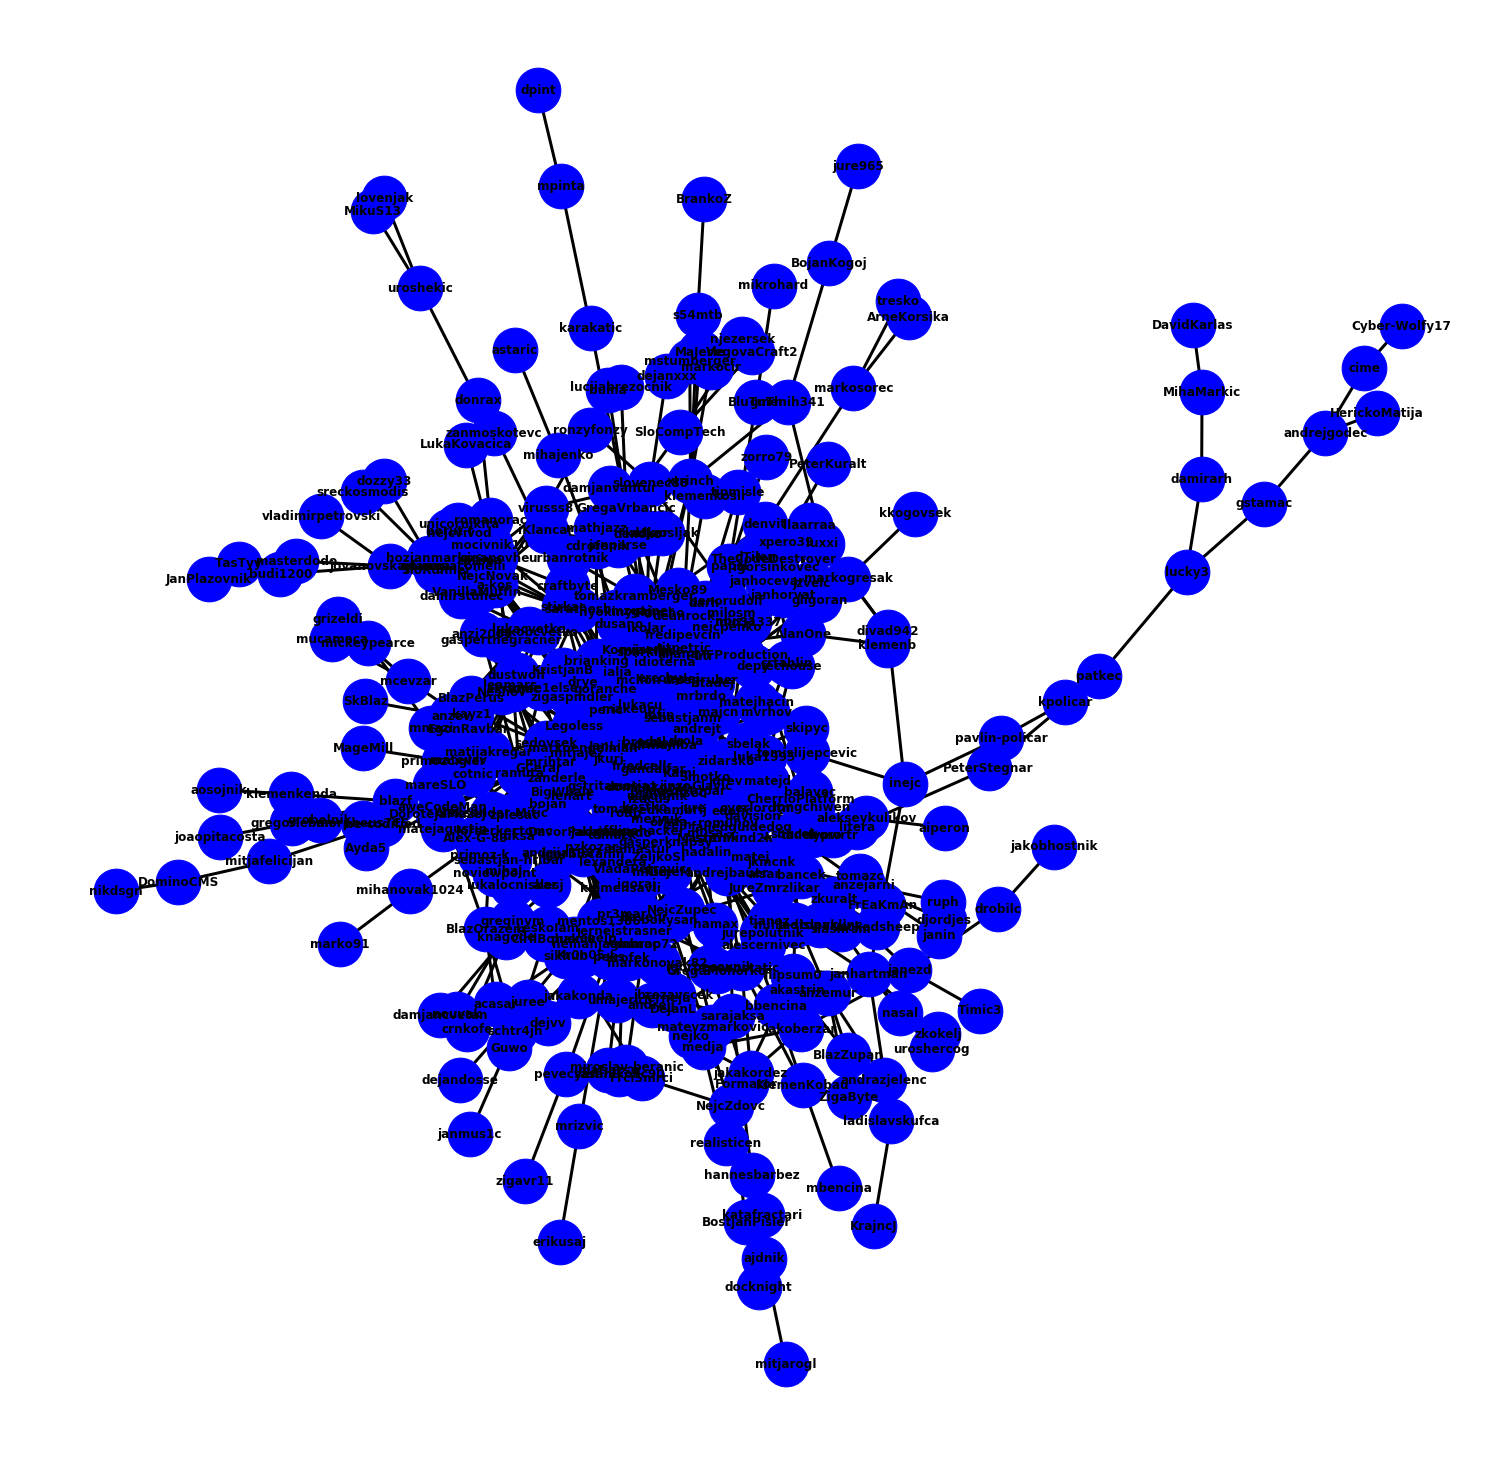

In [36]:
plt.figure(1,figsize=(20,20)) 
networkx.draw(S, 
        with_labels=True, 
        pos=networkx.spring_layout(S), 
        font_weight='bold', 
        node_color="blue", 
        width=3, 
        arrows=True, 
        node_size=2000,
             )

In [57]:
def get_lang_of_user(username, also_starred=False):
    languages = []
    user_repos = requests.get("https://api.github.com/users/" + username + "/repos", auth=(username,token))
    user_repos = json.loads(user_repos.text)
    for repo in user_repos:
        if "language" in repo:
            languages.append(repo["language"])
    if also_starred:
        user_starred = requests.get("https://api.github.com/users/" + username + "/starred", auth=(username,token))
        user_starred = json.loads(user_info_starred.text)
        for starred in user_starred:
            if "language" in starred:
                languages.append(starred["language"])
    return Counter(languages)

In [96]:
users_with_lang = dict()

In [97]:
for user in users_locations:
    if not user in users_with_lang:
        languages = get_lang_of_user(user, also_starred=True)
        users_with_lang[user] = languages

In [111]:
def user_uses_lang(lang, languages):
    if lang in languages:
        return True
    else:
        return False

In [112]:
def get_most_popular_lang_of_user(languages):
    return languages.most_common(1)[0][0]

In [113]:
users_python = set()
for user, lang in users_with_lang.items():
    if get_most_popular_lang_of_user(lang) == "Python":
        users_python.add(user)

In [116]:
all_filtered_relationships_python = []
for user1, user2 in all_filtered_relationships:
    if user1 in users_python and user2 in users_python:
        all_filtered_relationships_python.append(tuple([user1, user2]))

In [117]:
S = networkx.Graph()
S.add_edges_from(all_filtered_relationships_python)

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


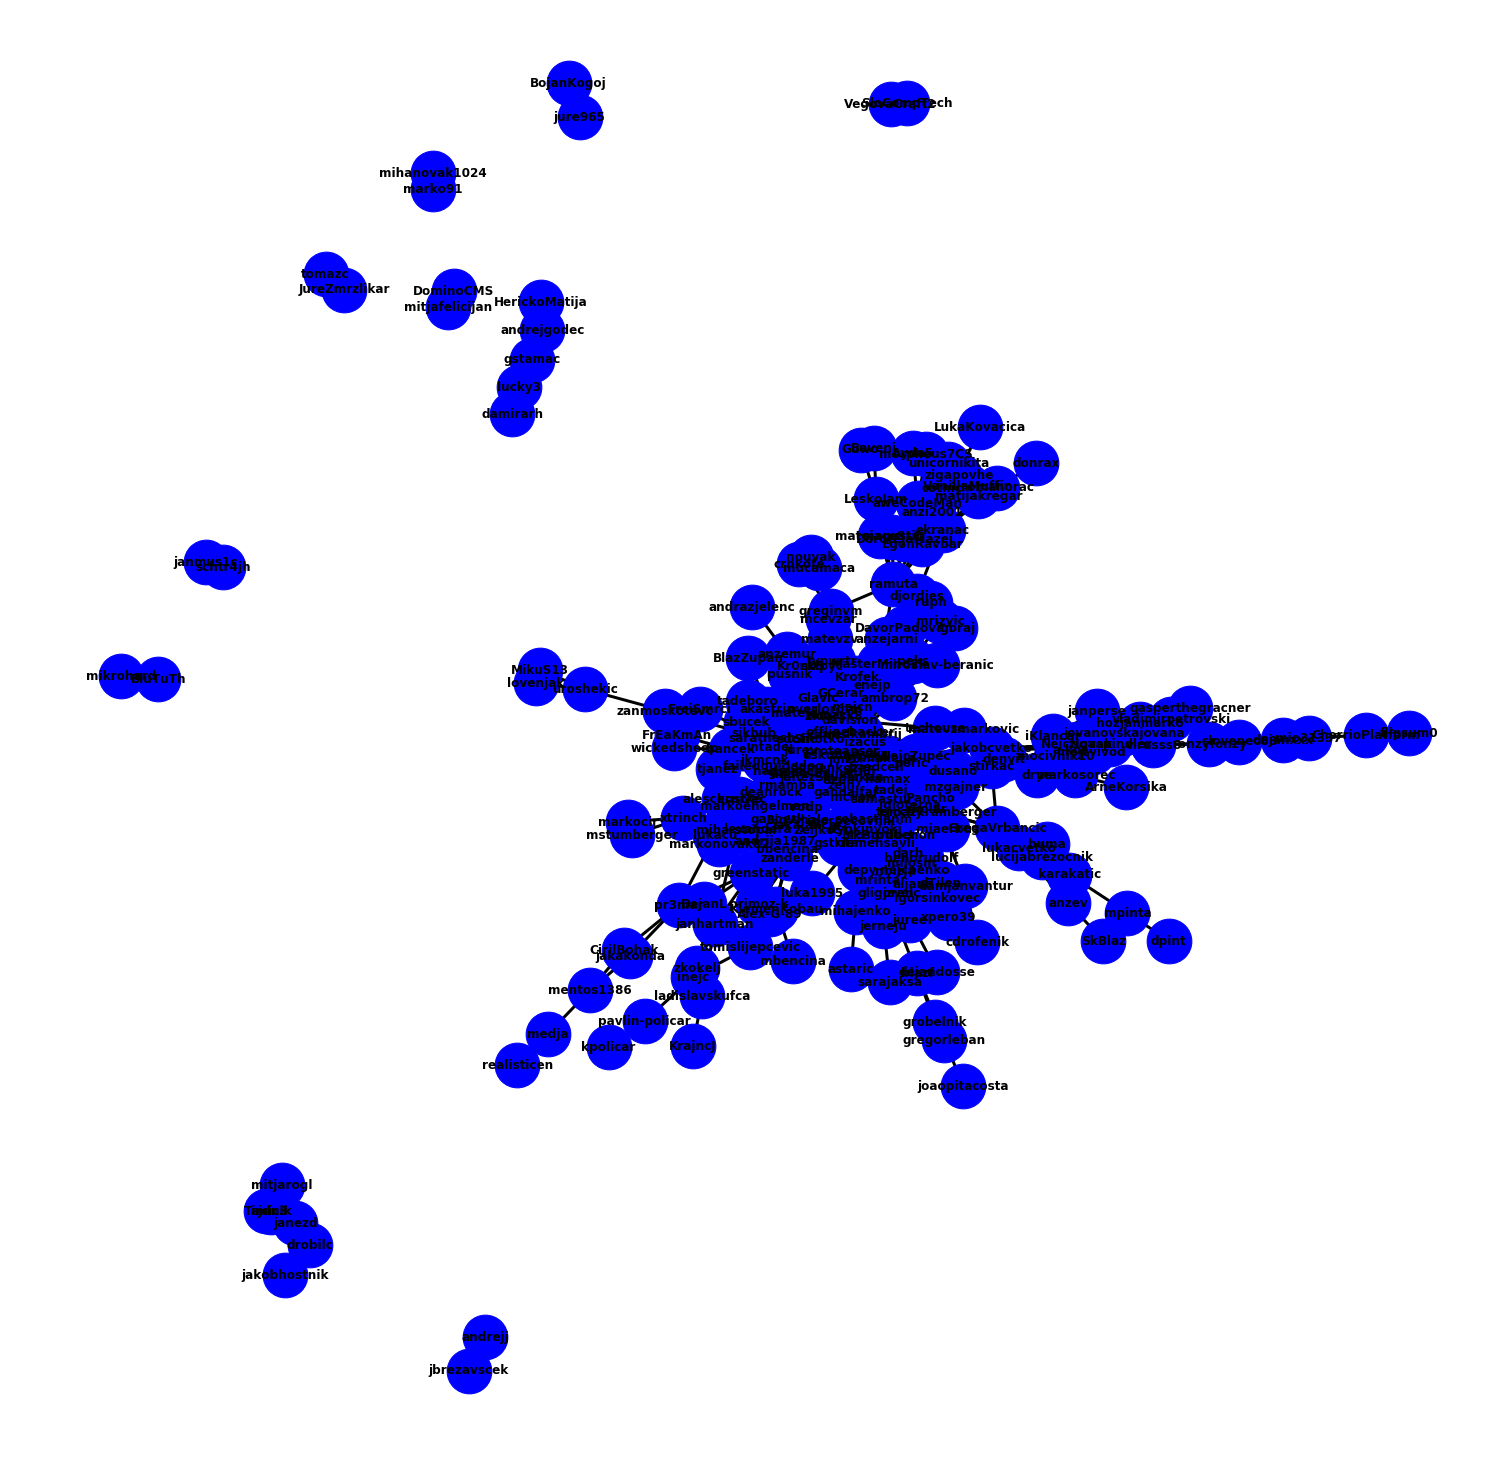

In [118]:
plt.figure(1,figsize=(20,20)) 
networkx.draw(S, 
        with_labels=True, 
        pos=networkx.spring_layout(S), 
        font_weight='bold', 
        node_color="blue", 
        width=3, 
        arrows=True, 
        node_size=2000,
             )

In [121]:
with open("github_users_lang-2019-05-09.pickle", "wb") as f:
    pickle.dump(users_with_lang, f)
with open("github_all_users-2019-05-09.pickle", "wb") as f:
    pickle.dump(all_users, f)
with open("github_users_locations-2019-05-09.pickle", "wb") as f:
    pickle.dump(users_locations, f)
with open("github_all_relationships-2019-05-09.pickle", "wb") as f:
    pickle.dump(all_relationships, f)